In [ ]:
#K-Means Coustering
#Elbow Method
#Principal component analysis (pCA)
#Dimansionality Reduction
#Cluster Visualization


#K-Means Coustering
''' 
5 step couster
   1. tell the machine - how many group, k=? if 3
   2. drop 3 random points (as group leader / starting point)
   3. others choose ther group
   4. move group leader in center
   5. repeat
'''

#Elbow Method
'''  
find elbow point \_
'''
#Principal component analysis (pCA)
'''
uses when data is large a lot of colume
but  you dont need it 
you need only summery 
without loseing information

give solution of  following problem 
   - Slower
   - visualize (500 colum)
   - overfitting
   

'''




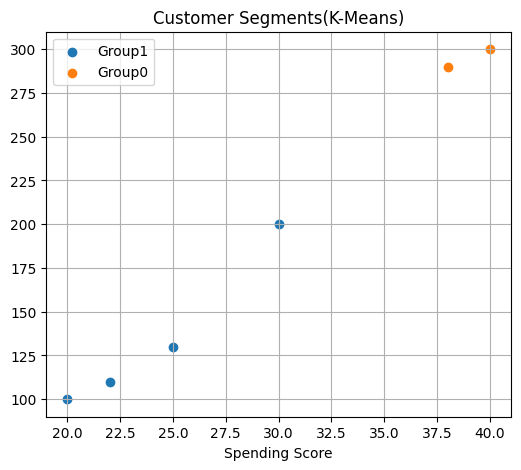

  Customer  Age  Spending  Group
0     Riya   20       100      1
1     Aman   30       200      1
2   Faizan   40       300      0
3     Neha   22       110      1
4    Imran   38       290      0
5    Sneha   25       130      1


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#sample data 
data ={
    'Customer':['Riya', 'Aman',' Faizan', 'Neha', 'Imran', 'Sneha'],
    'Age':[20, 30, 40, 22, 38, 25],
    'Spending':[100, 200, 300, 110, 290, 130]
}
df = pd.DataFrame(data)
X= df[['Age','Spending']]

model = KMeans(n_clusters=2 , random_state=42 , n_init=10) 
'''
n_cluster = 2 #number of cluster = how many part to devide
random_state = 42(use any number , but 42 is defult) ; suffel kore every time it start with a new point
n_init =10 (defult 10 time clusting(suffel) for big data n=20/50 )

overall - devide 2 part , and random state suffel 10 time and pick the best one then stop suffel(clusting)

'''

df['Group'] = model.fit_predict(X)

plt.figure (figsize=(6,5))
for group in df['Group'].unique():       #unique = create every group unique if 2 group-[0,1]
    group_data = df[df['Group']== group]  #masking /....... group filter + detect which group
    plt.scatter(group_data['Age'], group_data['Spending'], label=f'Group{group}')

plt.xlabel('Age')
plt.xlabel('Spending Score')
plt.title('Customer Segments(K-Means)')
plt.legend()
plt.grid(True)
plt.show()

print(df)


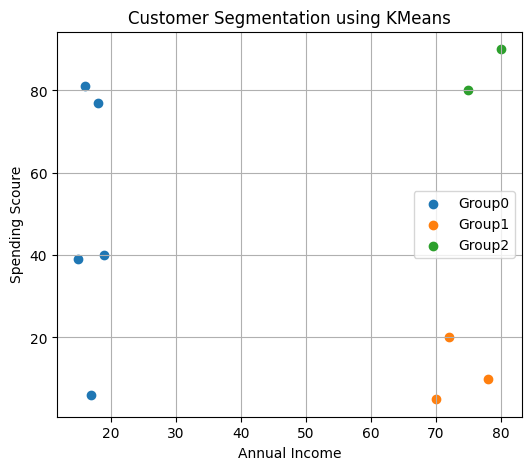

   CustomerID  AnnualIncome  SpendingScore  Group
0           1            15             39      0
1           2            16             81      0
2           3            17              6      0
3           4            18             77      0
4           5            19             40      0
5           6            70              5      1
6           7            72             20      1
7           8            75             80      2
8           9            78             10      1
9          10            80             90      2


In [5]:
#practice
#Customer Segmentation using KMeans

import pandas as pd
from  sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

data = {
    'CustomerID': [1,2,3,4,5,6,7,8,9,10],
    'AnnualIncome': [15,16,17,18,19,70,72,75,78,80],
    'SpendingScore': [39,81,6,77,40,5,20,80,10,90]
}

df= pd.DataFrame(data)

X= df[['AnnualIncome','SpendingScore']]

model = KMeans(n_clusters=3 , random_state=42 ,n_init=10)

df['Group'] = model.fit_predict(X)

plt.figure(figsize=(6,5))

for group in df['Group'].unique():
    group_data = df[df['Group']== group]
    plt.scatter(group_data['AnnualIncome'] , group_data['SpendingScore'], label=f'Group{group}' )

plt.xlabel('Annual Income')
plt.ylabel('Spending Scoure')
plt.title('Customer Segmentation using KMeans')
plt.legend()
plt.grid(True)
plt.show()

print(df)

Variance captured by each PCA Component:
[99.65  0.35]


C:\Users\Dell XPS\AppData\Local\Temp\ipykernel_1708\3040216425.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


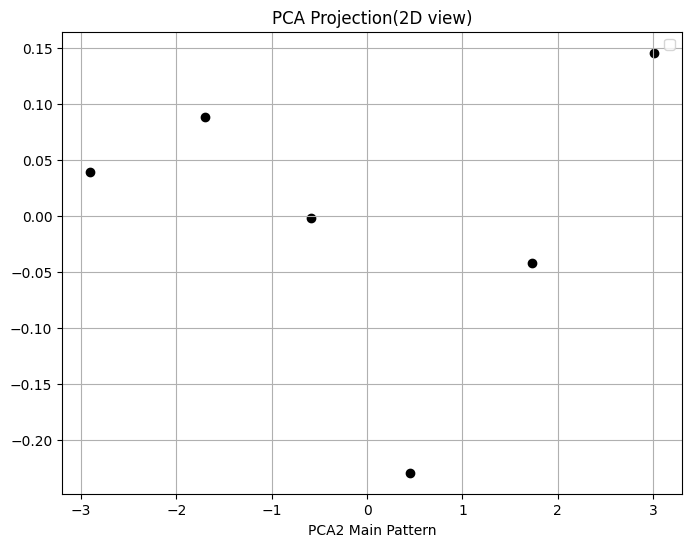

New Data with 2 features PCA1 PCA2 :        PCA1      PCA2
0 -2.901838  0.038962
1 -1.703939  0.088054
2 -0.585677 -0.001447
3  0.452949 -0.229542
4  1.730485 -0.041856
5  3.008020  0.145829


In [3]:
#PCA
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

'''
before pca 
standardscaler = scale data( arange data in a range )[z-score = (x - mean)/n where x= origenal value] # negative= bellow avarage; positive = avobe avg
PCA(decomposition) = convert large data into small component 
'''

data ={
    "Age" :    [25, 30, 35, 40, 45, 50],
    'Income':  [30000, 40000, 50000, 60000, 70000, 80000 ],
    'Spanding':[70, 60, 50, 40, 30, 20],
    'Savings': [1000, 5000, 8000, 10000, 15000, 20000]
}

df= pd.DataFrame(data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca =PCA(n_components=2)  #convert data into 2 components
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=['PCA1','PCA2'])

explained_variance = pca.explained_variance_ratio_  #tell how many variance information captured
print("Variance captured by each PCA Component:")
print(np.round(explained_variance *100, 2))

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], color='black',)
plt.title("PCA Projection(2D view)")
plt.xlabel('PCA1 Main Pattern')
plt.xlabel('PCA2 Main Pattern')
plt.grid(True)
plt.legend()
plt.show()

print("New Data with 2 features PCA1 PCA2 :", pca_df)



Variance Captured in each column :  [56.61 25.05]


C:\Users\Dell XPS\AppData\Local\Temp\ipykernel_1708\3973366881.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


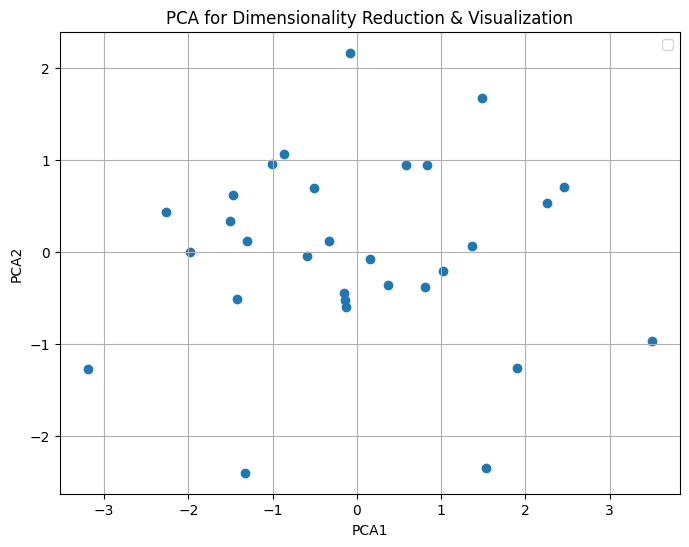

New PCA Dataframe: 
         PCA1      PCA2
0  -0.141875 -0.522108
1  -1.303806  0.124230
2  -1.423352 -0.512508
3  -1.470381  0.621253
4  -0.131520 -0.595356
5   2.458170  0.703911
6  -0.589942 -0.044585
7  -0.329161  0.121410
8  -2.265723  0.437562
9  -1.508451  0.337019
10  0.812060 -0.378432
11 -0.506091  0.691681
12 -1.976250  0.000053
13 -3.189988 -1.270604
14  1.532510 -2.349002
15  3.498182 -0.962926
16  1.897144 -1.257059
17  0.371975 -0.357917
18  2.251152  0.532940
19  1.019078 -0.207461
20  0.585727  0.941839
21  1.363979  0.069992
22 -1.326921 -2.396270
23  1.482547  1.667717
24 -0.085322  2.162408
25 -0.864699  1.064701
26  0.838796  0.940035
27  0.156975 -0.071880
28 -0.152230 -0.448860
29 -1.002583  0.958219


In [16]:
#practice PCA
#PCA for Dimensionality Reduction & Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv("iris.csv")
X = data.copy()
df = data.drop("Species", axis=1)

scaler = StandardScaler()
data_scaler = scaler.fit_transform(df)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaler)

pca_df = pd.DataFrame(data_pca, columns=['PCA1','PCA2'])

explained_variance = pca.explained_variance_ratio_
print("Variance Captured in each column : ", np.round(explained_variance*100, 2))

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], )
plt.title("PCA for Dimensionality Reduction & Visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.legend()
plt.show()

print("New PCA Dataframe: \n", pca_df)

